In [1]:
for p in range(0, 20, 2):
    print(p)


0
2
4
6
8
10
12
14
16
18


In [6]:
for p in range(0, 20-2, 2):
    print([i for i in range(p, p+4)])

[0, 1, 2, 3]
[2, 3, 4, 5]
[4, 5, 6, 7]
[6, 7, 8, 9]
[8, 9, 10, 11]
[10, 11, 12, 13]
[12, 13, 14, 15]
[14, 15, 16, 17]
[16, 17, 18, 19]


In [9]:
for p in range(0, 12+1-6, 6):
    print([i for i in range(p, p+6)])

[0, 1, 2, 3, 4, 5]
[6, 7, 8, 9, 10, 11]


In [ ]:
for p in range(0, 18, 4):
    
    if p+4<18:
        print(list(range(p, p+4)))

[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10, 11]
[12, 13, 14, 15]
[16, 17, 18, 19]


## Cálculo Manual - Cubo

-0.25 1.0
-0.16666666666666666 0.6666666666666666
-0.5 0.6666666666666666
-0.75 1.0
-0.25 0.5
-0.16666666666666666 0.3333333333333333
-0.5 0.3333333333333333
-0.75 0.5


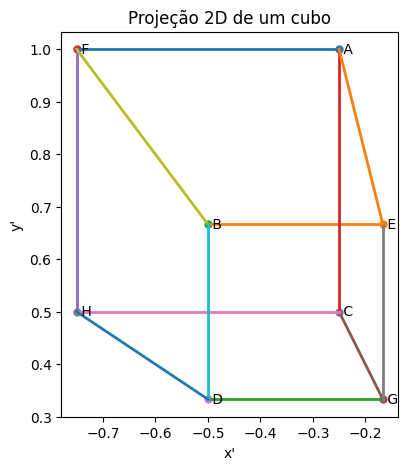

In [16]:
import matplotlib.pyplot as plt

def pinhole(ponto, camera, d=1):
    
    x, y, z = ponto
    xc, yc, zc = camera
    
    u = d*((x-xc)/(z-zc))
    v = d*((y-yc)/(z-zc))
    
    print(-u, -v)
   
    return (-u, -v)

cubo = [
    (-1, -1, -1),  
    (-1, -1,  1),  
    ( 1, -1,  1),  
    ( 1, -1, -1),
    (-1,  1, -1),  
    (-1,  1,  1),  
    ( 1,  1,  1),  
    ( 1,  1, -1)   
]

camera = (-2, 3, -5)

cubo_projetado = [pinhole(p, camera) for p in cubo]

edges = [
    ("A","F"), ("B","E"), ("G","D"), ("C","A"),
    ("H","F"), ("C","G"), ("C","H"), ("G","E"),
    ("B","F"), ("B","D"), ("D","H"), ("A","E"),
]

labels = ["A", "E", "B", "F", "C", "G", "D", "H"]

pts = {lbl: cubo_projetado[i] for i, lbl in enumerate(labels)}

fig, ax = plt.subplots(figsize=(5, 5))
for u, v in edges:
    x0, y0 = pts[u]
    x1, y1 = pts[v]
    ax.plot([x0, x1], [y0, y1], linewidth=2)

for lbl, (x, y) in pts.items():
    ax.scatter([x], [y], s=25)
    ax.text(x, y, f" {lbl}", va="center", ha="left")

ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_title("Projeção 2D de um cubo")
plt.show()

## Multiplicação Matricial - Cubo

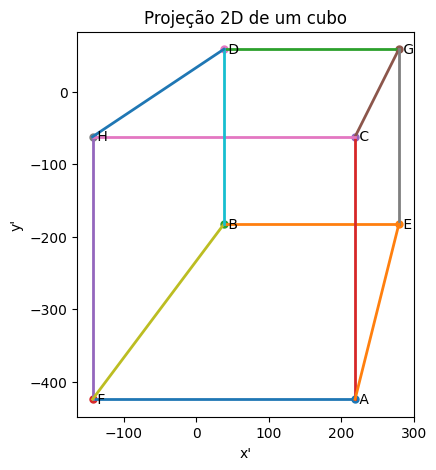

In [24]:
import numpy as np
import matplotlib.pyplot as plt

width = 800   # largura da tela
height = 600  # altura da tela
near = 0.01   # plano de corte próximo
far = 1000    # plano de corte distante



def rotation_matrix(qr, qi, qj, qk):
    return np.array([
        [1 - 2*(qj**2 + qk**2), 2*(qi*qj - qk*qr), 2*(qi*qk + qj*qr), 0],
        [2*(qi*qj + qk+qr), 1 - 2*(qi**2 + qk**2), 2*(qj*qk - qi*qr), 0],
        [2*(qi*qk - qj*qr), 2*(qj*qk + qi*qr), 1 - 2*(qi**2 + qj**2), 0],
        [0, 0, 0, 1]
    ])
    
def translation_matrix(x, y, z):
    return np.array([
        [1, 0, 0, -x],
        [0, 1, 0, -y],
        [0, 0, 1, -z],
        [0, 0, 0, 1]
    ])

def perspective_matrix(far, near, right, top):
    return np.array([
        [near/right, 0, 0, 0],
        [0, near/top, 0, 0],
        [0, 0, -((far+near)/(far-near)), -(2*far*near)/(far-near)],
        [0, 0, -1, 0]
    ])

def screen_transformation(W,H):
    return np.array([
        [W/2, 0, 0, W/2],
        [0, -H/2, 0, H/2],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])



position = [-2, 3, -5]
orientation = [0.0, 0.0, 0.0, 0.0] 
fieldOfView = 0.7853981633974483 

aspect = width/height

top = near * np.tan(fieldOfView/2)
bottom = -top
right = top*aspect
left = -right

cubo = np.array([
    [-1, -1, -1,  1],  
    [-1, -1,  1,  1],  
    [ 1, -1,  1,  1],  
    [ 1, -1, -1,  1],
    [-1,  1, -1,  1],  
    [-1,  1,  1,  1],  
    [ 1,  1,  1,  1],  
    [ 1,  1, -1,  1]   
]).T


translation = translation_matrix(position[0], position[1], position[2])

rot = rotation_matrix(orientation[0], orientation[1], orientation[2], orientation[3])

cubo_projetado = screen_transformation(width, height) @ perspective_matrix(far, near, right, top) @ np.linalg.inv(rot) @ translation @ cubo

edges = [
    ("A","F"), ("B","E"), ("G","D"), ("C","A"),
    ("H","F"), ("C","G"), ("C","H"), ("G","E"),
    ("B","F"), ("B","D"), ("D","H"), ("A","E"),
]

labels = ["A", "E", "B", "F", "C", "G", "D", "H"]

pts = {lbl: (cubo_projetado[0][i]/cubo_projetado[3][i], cubo_projetado[1][i]/cubo_projetado[3][i]) for i, lbl in enumerate(labels)}

fig, ax = plt.subplots(figsize=(5, 5))
for u, v in edges:
    x0, y0 = pts[u]
    x1, y1 = pts[v]
    ax.plot([x0, x1], [y0, y1], linewidth=2)

for lbl, (x, y) in pts.items():
    ax.scatter([x], [y], s=25)
    ax.text(x, y, f" {lbl}", va="center", ha="left")

ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_title("Projeção 2D de um cubo")
plt.show()

## Sem Levar Orientação em Consideração - Triângulo

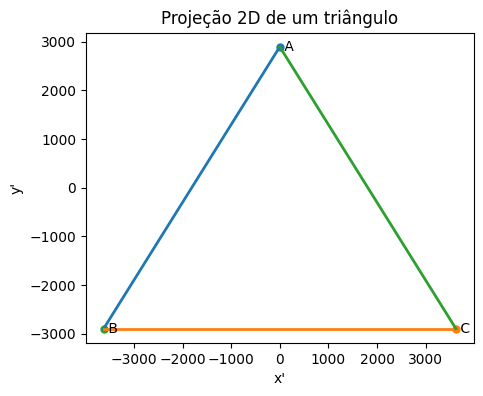

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

width = 800   # largura da tela
height = 600  # altura da tela
near = 0.01   # plano de corte próximo
far = 1000    # plano de corte distante



def rotation_matrix(qr, qi, qj, qk):
    return np.array([
        [1 - 2*(qj**2 + qk**2), 2*(qi*qj - qk*qr), 2*(qi*qk + qj*qr), 0],
        [2*(qi*qj + qk+qr), 1 - 2*(qi**2 + qk**2), 2*(qj*qk - qi*qr), 0],
        [2*(qi*qk - qj*qr), 2*(qj*qk + qi*qr), 1 - 2*(qi**2 + qj**2), 0],
        [0, 0, 0, 1]
    ])
    
def translation_matrix(x, y, z):
    return np.array([
        [1, 0, 0, -x],
        [0, 1, 0, -y],
        [0, 0, 1, -z],
        [0, 0, 0, 1]
    ])

def perspective_matrix(far, near, right, top):
    return np.array([
        [near/right, 0, 0, 0],
        [0, near/top, 0, 0],
        [0, 0, -((far+near)/(far-near)), -(2*far*near)/(far-near)],
        [0, 0, -1, 0]
    ])

def screen_transformation(W,H):
    return np.array([
        [W/2, 0, 0, W/2],
        [0, -H/2, 0, H/2],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])



position = [0.0, 0.0, -5.0] 
orientation = [0.0, -1.0, 0.0, 3.1415] 
fieldOfView = 0.7853981633974483 

aspect = width/height

top = near * np.tan(fieldOfView/2)
bottom = -top
right = top*aspect
left = -right

triangulo = np.array([
    [0.0, -4.0, 0.0, 1],  
    [5.0, 4.0, 0.0, 1],  
    [-5.0, 4.0, 0.0, 1]
]).T

triangulo_projetado = screen_transformation(width, height) @ perspective_matrix(far, near, right, top) @ triangulo

edges = [
    ("A","B"), ("B","C"), ("C","A")
]

labels = ["A", "C", "B"]

pts = {lbl: (triangulo_projetado[0][i], triangulo_projetado[1][i]) for i, lbl in enumerate(labels)}

fig, ax = plt.subplots(figsize=(5, 5))
for u, v in edges:
    x0, y0 = pts[u]
    x1, y1 = pts[v]
    ax.plot([x0, x1], [y0, y1], linewidth=2)

for lbl, (x, y) in pts.items():
    ax.scatter([x], [y], s=25)
    ax.text(x, y, f" {lbl}", va="center", ha="left")

ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_title("Projeção 2D de um triângulo")
plt.show()

## Tentativa com Orientação - Triângulo

[[ 0.          5.         -5.        ]
 [-3.26396323  3.26396323  3.26396323]
 [ 7.3122595   2.6877405   2.6877405 ]
 [ 1.          1.          1.        ]]
[[400.06710567 -70.95583883 871.14682185]
 [492.00141943  -7.4803132   -7.51737334]
 [  0.99839559   0.99741859   0.99741827]
 [  1.           1.           1.        ]]


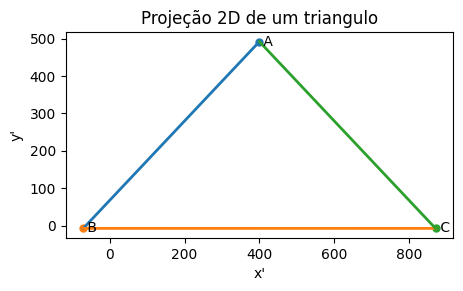

In [22]:
import numpy as np
import matplotlib.pyplot as plt

width = 800   # largura da tela
height = 600  # altura da tela
near = 0.01   # plano de corte próximo
far = 1000    # plano de corte distante


def axis_angle_to_quat(axis, angle):
    
    ax = np.asarray(axis, dtype=float)
    n = np.linalg.norm(ax)
    
    if n == 0:
        return (0.0, 0.0, 0.0, 1.0)
    
    ax = ax / n
    
    half = angle * 0.5
    
    s = np.sin(half)
    qr = np.cos(half)   
          
    qi, qj, qk = ax * s   
        
    return (qi, qj, qk, qr)


def look_at(eye, at, up):
    def _norm(v): 
        return float(np.linalg.norm(v))

    def normalize(v, name, eps=1e-12):
        n = _norm(v)
        if n < eps:
            raise ValueError(f"Cannot normalize. {name}")
        return v / n

    
    w = normalize(at - eye, "at - eye")       
    u = normalize(np.cross(w, up), "up")    
    v = np.cross(u, w)                

    T = np.array([
        [1, 0, 0, -eye[0]],
        [0, 1, 0, -eye[1]],
        [0, 0, 1, -eye[2]],
        [0, 0, 0, 1]
    ])
    
    M = np.array([
        [u[0], v[0], -w[0], 0],
        [u[1], v[1], -w[1], 0],
        [u[2], v[2], -w[2], 0],
        [0, 0, 0, 1]
    ]).T

    return M @ T


def rotation_matrix(qi, qj, qk, qr):
    q = np.array([qr, qi, qj, qk], dtype=float)
    
    n = np.linalg.norm(q)
    
    if n == 0:
        return np.eye(4)
    
    qr, qi, qj, qk = q / n  

    return np.array([
        [1 - 2*(qj*qj + qk*qk),   2*(qi*qj - qk*qr),   2*(qi*qk + qj*qr), 0],
        [2*(qi*qj + qk*qr),       1 - 2*(qi*qi + qk*qk), 2*(qj*qk - qi*qr), 0],
        [2*(qi*qk - qj*qr),       2*(qj*qk + qi*qr),   1 - 2*(qi*qi + qj*qj), 0],
        [0,                       0,                   0,                   1]
    ], dtype=float)
    
def translation_matrix(x, y, z):
    return np.array([
        [1, 0, 0, x],
        [0, 1, 0, y],
        [0, 0, 1, z],
        [0, 0, 0, 1]
    ])

def perspective_matrix(far, near, right, top):
    return np.array([
        [near/right, 0, 0, 0],
        [0, near/top, 0, 0],
        [0, 0, -((far+near)/(far-near)), -(2*far*near)/(far-near)],
        [0, 0, -1, 0]
    ])

def screen_transformation(W,H):
    return np.array([
        [W/2, 0, 0, W/2],
        [0, -H/2, 0, H/2],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])


position = [0.0, 0.0, -5.0]
orientation = [0.0, -1.0, 0.0, 3.1415] 
fieldOfView = 0.7853981633974483 


aspect = width/height

top = near * np.tan(fieldOfView/2)
bottom = -top
right = top*aspect
left = -right

triangulo = np.array([
    [0.0, -4.0, 0.0, 1],  
    [5.0, 4.0, 0.0, 1],  
    [-5.0, 4.0, 0.0, 1]
]).T

translation = [0,0,5]

rotation = [-1.0, 0.0, 0.0, 3.1415]

axis  = orientation[:3]
angle = float(orientation[3])

qi, qj, qk, qr = axis_angle_to_quat(axis, angle)
R4 = rotation_matrix(qi, qj, qk, qr)
R  = R4[:3, :3]                  

fwd_cam = np.array([0.0, 0.0, -1.0])  
up_cam  = np.array([0.0, 1.0,  0.0])  

fwd_world = R @ fwd_cam
up_world  = R @ up_cam

eye = np.array(position)
at  = eye + fwd_world
up  = up_world

view = look_at(eye, at, up)

mundo = translation_matrix(translation[0], translation[1], translation[2]) @ rotation_matrix(-1, 0.0, 0.0, 3.1415)

print(mundo @ triangulo)

triangulo_projetado = perspective_matrix(far, near, right, top) @ view @ mundo @ triangulo

triangulo_projetado[0, :] = triangulo_projetado[0, :] / triangulo_projetado[3, :]

triangulo_projetado[1, :] = triangulo_projetado[1, :] / triangulo_projetado[3, :]
    
triangulo_projetado[2, :] = triangulo_projetado[2, :] / triangulo_projetado[3, :]

triangulo_projetado[3, :] = triangulo_projetado[3, :] / triangulo_projetado[3, :]


triangulo_projetado = screen_transformation(width, height) @ triangulo_projetado

print(triangulo_projetado)

edges = [
    ("A","B"), ("B","C"), ("C","A")
]

labels = ["A", "B", "C"]

pts = {lbl: (triangulo_projetado[0][i], triangulo_projetado[1][i]) for i, lbl in enumerate(labels)}

fig, ax = plt.subplots(figsize=(5, 5))
for u, v in edges:
    x0, y0 = pts[u]
    x1, y1 = pts[v]
    ax.plot([x0, x1], [y0, y1], linewidth=2)

for lbl, (x, y) in pts.items():
    ax.scatter([x], [y], s=25)
    ax.text(x, y, f" {lbl}", va="center", ha="left")

ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_title("Projeção 2D de um triangulo")
plt.show()

In [4]:
for i in range(0, 20, 2):
    print(0, i+1, i+2)

0 1 2
0 3 4
0 5 6
0 7 8
0 9 10
0 11 12
0 13 14
0 15 16
0 17 18
0 19 20
